In [1]:
import numpy as np
from matplotlib import pyplot as plt
import py_gauge_mc

from tqdm.notebook import tqdm

# Villain

$$\tilde V(n_p) = n_p^2 $$

Calculate average $\mathcal{E}(K) = \frac{1}{L^4} \sum_p \frac{1}{K} \tilde V(n_p)$

In [2]:
L = 16

inv_ks = list(np.linspace(0.1,1.0,30))
inv_ks = inv_ks + list(np.linspace(0.6,0.7,10))
inv_ks = np.array(list(sorted(set(inv_ks))))
ws = list(range(5))

all_windings = []
all_energies = []
for inv_k in tqdm(inv_ks,desc='K'):
    k_winding_nums = []
    k_energies = []
    for w in ws:
        state = np.zeros((L,L,L,L,6), dtype=np.int32)
        state[0,:,:,0,3] = w
        vns = [(n**2)*inv_k for n in range(100)]
        graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns,initial_state=state)

        graph.run_local_update(1000)

        winding_nums, energies = graph.simulate_and_get_winding_nums_and_energies(100, steps_per_sample=10, run_global_updates=False)
        k_winding_nums.append(winding_nums)
        k_energies.append(energies)
    all_windings.append(k_winding_nums)
    all_energies.append(k_energies)
all_windings = np.array(all_windings)
all_energies = np.array(all_energies)

K:   0%|          | 0/40 [00:00<?, ?it/s]

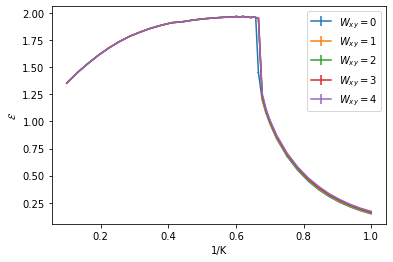

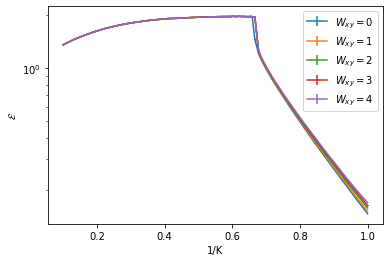

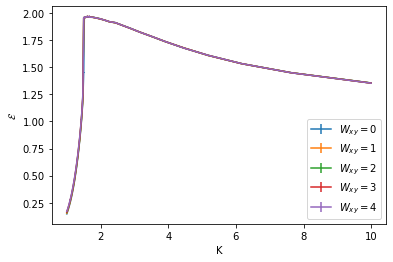

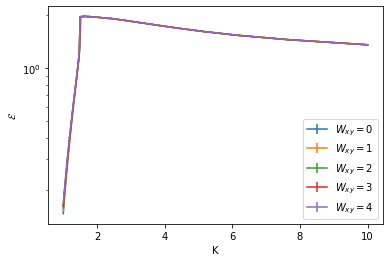

In [9]:
for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()


for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) / (L**4) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) / (L**4) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$W_{{xy}}={}$'.format(ws[i]))
plt.legend()
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()

In [13]:
Ls = np.arange(4,22,2)
inv_ks = list(np.linspace(0.1,1.0,30))
inv_ks = inv_ks + list(np.linspace(0.6,0.7,10))
inv_ks = np.array(list(sorted(set(inv_ks))))
ws = list(range(5))

all_windings = []
all_energies = []
for inv_k in tqdm(inv_ks,desc='K'):
    k_winding_nums = []
    k_energies = []
    for L in Ls:
        vns = [(n**2)*inv_k for n in range(100)]
        graph = py_gauge_mc.GPUGaugeTheory(L,L,L,L,vns)

        graph.run_local_update(1000)

        winding_nums, energies = graph.simulate_and_get_winding_nums_and_energies(100, steps_per_sample=10, run_global_updates=False)
        k_winding_nums.append(winding_nums)
        k_energies.append(energies / (L**4))
    all_windings.append(k_winding_nums)
    all_energies.append(k_energies)
all_windings = np.array(all_windings)
all_energies = np.array(all_energies)

K:   0%|          | 0/40 [00:00<?, ?it/s]

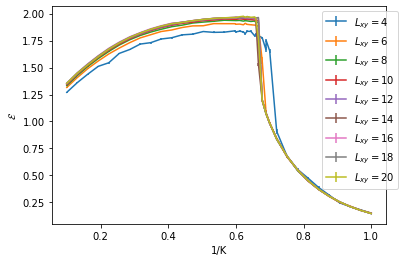

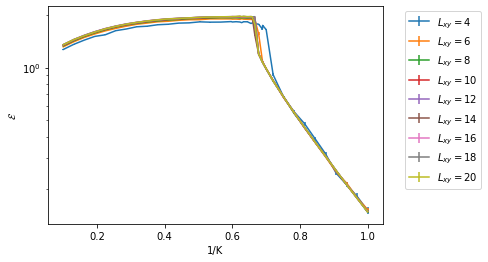

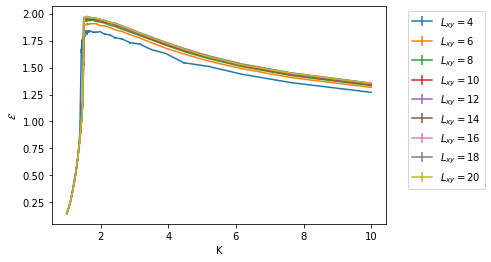

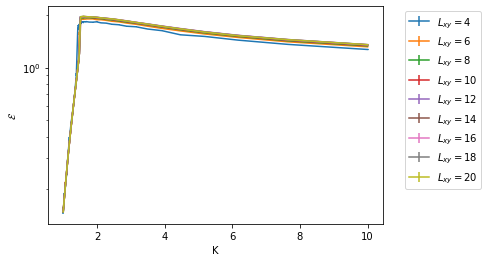

In [15]:
for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$L_{{xy}}={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(inv_ks, es, yerr=es_err,label='$L_{{xy}}={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('1/K')
plt.show()

for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$L_{{xy}}={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()


for i in range(all_energies.shape[1]):
    es = all_energies[:,i,:].mean(axis=-1) #/inv_ks
    es_err = all_energies[:,i,:].std(axis=-1)/np.sqrt(all_energies.shape[-1]) #/inv_ks
    plt.errorbar(1/inv_ks, es, yerr=es_err,label='$L_{{xy}}={}$'.format(Ls[i]))
plt.legend(bbox_to_anchor=(1.05,1.0))
plt.yscale('log')
plt.ylabel(r'$\mathcal{E}$')
plt.xlabel('K')
plt.show()